# Données sur la Qualité de l'Air en Inde (2015 - 2020)
Indice de Qualité de l'Air (IQA) et données horaires par stations et villes en Inde

https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

**Prédiction de l'Indice de Qualité de l'Air (IQA) avec Python**
Dernière mise à jour : 27 mai 2025

La **pollution de l'air** est une préoccupation croissante à l'échelle mondiale, et avec l'industrialisation et l'urbanisation accrues, il devient crucial de surveiller et de prédire la qualité de l'air en temps réel. L'une des façons les plus fiables de quantifier la pollution de l'air est de calculer l'**Indice de Qualité de l'Air (IQA)**. Dans cet article, nous allons explorer comment prédire l'IQA en utilisant **Python**, en tirant parti des outils de **science des données** et des algorithmes d'apprentissage automatique (**machine learning**).

**Qu'est-ce que l'IQA ?**
L'**Indice de Qualité de l'Air (IQA ou AQI en Anglais)** est un indicateur normalisé utilisé pour communiquer le degré de pollution actuel de l'air ou la pollution prévue. L'IQA est calculé à partir des polluants

In [4]:
!pip install dagshub
!pip install --upgrade typing_extensions


In [5]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


In [6]:

import os
import pandas as pd
import numpy as np

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    log_loss,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


#  MLflow configuration (envoi vers DagsHub)

mlflow.set_tracking_uri(
    "https://dagshub.com/yasmine.ameur199/Air_Quality_Data_in_India.mlflow"
)



In [7]:
import mlflow
from dagshub import dagshub_logger

print("Imports OK 👍")


Imports OK 👍


In [8]:
os.environ['MLFLOW_TRACKING_USERNAME'] = "yasmine.ameur199"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "056e487658dddd64fefc0ced79eb6ea9dd1d4949"


In [9]:
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [10]:
colonnes = df.columns
print(f'\n Les {df.shape[1]} colonnes sont: {colonnes.tolist()}')


 Les 16 colonnes sont: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [11]:
colonnes_numérique = df.select_dtypes(include='number').columns

print(f'\n Nombre de colonnes numeriques: {colonnes_numérique.nunique()}')
print(f'\n Les colonnes numérique sont: {colonnes_numérique.tolist()}')


 Nombre de colonnes numeriques: 13

 Les colonnes numérique sont: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


In [12]:
colonnes_catégorique = df.select_dtypes(include='object').columns

print(f'\n Nombre de colonnes catégorique: {colonnes_catégorique.nunique()}')
print(f'\n Les colonnes catégorique sont: {colonnes_catégorique.tolist()}')



 Nombre de colonnes catégorique: 3

 Les colonnes catégorique sont: ['City', 'Date', 'AQI_Bucket']


# Analyse exploratoire

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [15]:
# Check for missing values in each column
print("\n Valeurs manquantes:")
df.isnull().sum()


 Valeurs manquantes:


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Pretraitement

In [16]:
# Nous allons remplacer les valeurs manquantes des polluants avec la médiane de la colonne (robuste pour les skewed data)
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

#### Nous n'avons plus de valeurs manquanytes de type numerique dans nos jeu de données Il reste maintenant a imputer les valeurs manquantes de type categorique avec les valeurs les plus frequentes c.à.d : le mode


In [17]:
df['AQI_Bucket'].value_counts(dropna=False)

AQI_Bucket
Moderate        8829
Satisfactory    8224
NaN             4681
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [18]:
# Pour le feature AQI_Bucket, nous avons NaN	4681 valeurs manquantes et Moderate est le plus frequent, mode

# Donc nous allons utiliser Moderate pour remplacer les valeurs manquantes de AQI_Bucket

In [19]:
df['AQI_Bucket'].mode()

0    Moderate
Name: AQI_Bucket, dtype: object

In [20]:
# Impute missing values in 'AQI_Bucket' with the mode
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

# Display the value counts after imputation to verify
df['AQI_Bucket'].value_counts(dropna=False)


AQI_Bucket
Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: count, dtype: int64

In [21]:
# Verification des valeurs manquantes sur notre dataFrame

df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

### Encodage des colonnes categoriques

In [22]:
# Encodage de la colonne AQI_Bucket


# Definition de l'ordre des categories AQI_BUCKET du pire au meilleur
aqi_order = ['Severe', 'Very Poor', 'Poor', 'Moderate', 'Satisfactory', 'Good']

# Initialize du OrdinalEncoder avec l'ordre specifié
encoder = OrdinalEncoder(categories=[aqi_order])

# Fit et transform de la colonne 'AQI_Bucket'
df['AQI_Bucket_Encoded'] = encoder.fit_transform(df[['AQI_Bucket']])
df = df.drop('AQI_Bucket', axis=1) # On supprime ensuite la colonne initiale non-encodée

df['AQI_Bucket_Encoded'].unique() # On visualise les valeurs des encodages

array([3., 2., 1., 0., 4., 5.])

In [23]:
df['AQI_Bucket_Encoded'].value_counts().values

array([13510,  8224,  2781,  2337,  1341,  1338], dtype=int64)

In [24]:
# Pourcentage des repartitions des valeurs de la colonne target
print('Le pourcentage de distribution de la cible "AQI_Bucket" est: ')
df['AQI_Bucket_Encoded'].value_counts(normalize=True) *100

Le pourcentage de distribution de la cible "AQI_Bucket" est: 


AQI_Bucket_Encoded
3.0    45.748535
4.0    27.848701
2.0     9.417223
1.0     7.913718
5.0     4.540991
0.0     4.530832
Name: proportion, dtype: float64

C:\Users\16133\AppData\Local\Temp\ipykernel_29612\2896654396.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["AQI_Bucket_Encoded"], palette="viridis", edgecolor="grey")


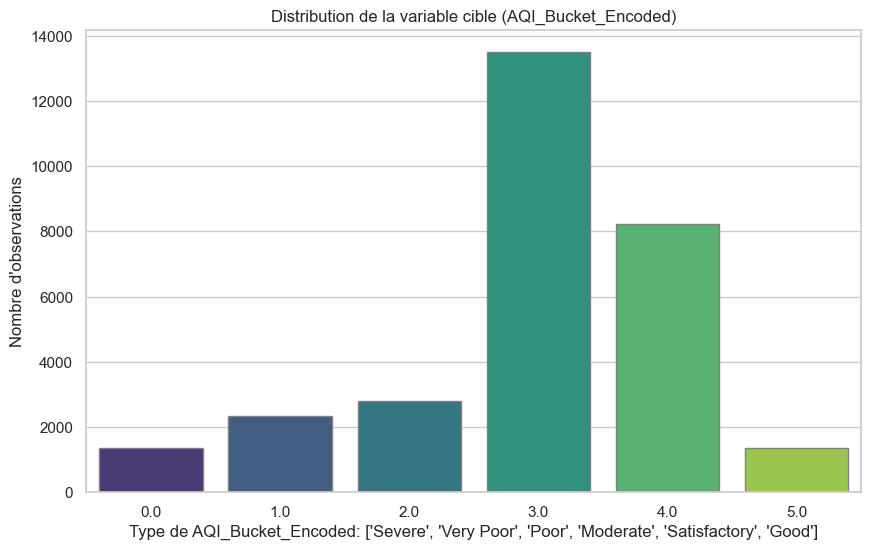

In [25]:


# Définir le style des graphiques
sns.set_theme(style="whitegrid")

# Histogramme de la variable cible (target)
plt.figure(figsize=(10, 6))

sns.countplot(x=df["AQI_Bucket_Encoded"], palette="viridis", edgecolor="grey")
plt.title("Distribution de la variable cible (AQI_Bucket_Encoded)")
plt.xlabel("Type de AQI_Bucket_Encoded: ['Severe', 'Very Poor', 'Poor', 'Moderate', 'Satisfactory', 'Good']")
plt.ylabel("Nombre d'observations")
plt.show()



In [26]:
# Visualisation de city puis encodage par frequence

print(f'Number of unique cities: {df["City"].nunique()}\n')
print(f'Unique city names: {df["City"].unique().tolist()}\n')
print(f'City value counts:\n{df["City"].value_counts()}')

Number of unique cities: 26

Unique city names: ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']

City value counts:
City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal     

In [27]:
# Encodage de 'City' par frequence


city_frequency = df['City'].value_counts(normalize=True)
df['City_Frequency_Encoded'] = df['City'].map(city_frequency)
df = df.drop('City', axis=1)
df





,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket_Encoded,City_Frequency_Encoded
0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,3.0,0.068030
1,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,3.0,0.068030
2,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,3.0,0.068030
3,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,3.0,0.068030
4,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,3.0,0.068030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,5.0,0.049507
29527,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,4.0,0.049507
29528,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,4.0,0.049507
29529,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,4.0,0.049507


In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['annee'] = df['Date'].dt.year
df['mois'] = df['Date'].dt.month
df['jour'] = df['Date'].dt.day
# df['heure'] = df['Date'].dt.hour
df = df.drop('Date', axis=1)
df


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket_Encoded,City_Frequency_Encoded,annee,mois,jour
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,3.0,0.068030,2015,1,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,3.0,0.068030,2015,1,2
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,3.0,0.068030,2015,1,3
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,3.0,0.068030,2015,1,4
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,3.0,0.068030,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,5.0,0.049507,2020,6,27
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,4.0,0.049507,2020,6,28
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,4.0,0.049507,2020,6,29
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,4.0,0.049507,2020,6,30


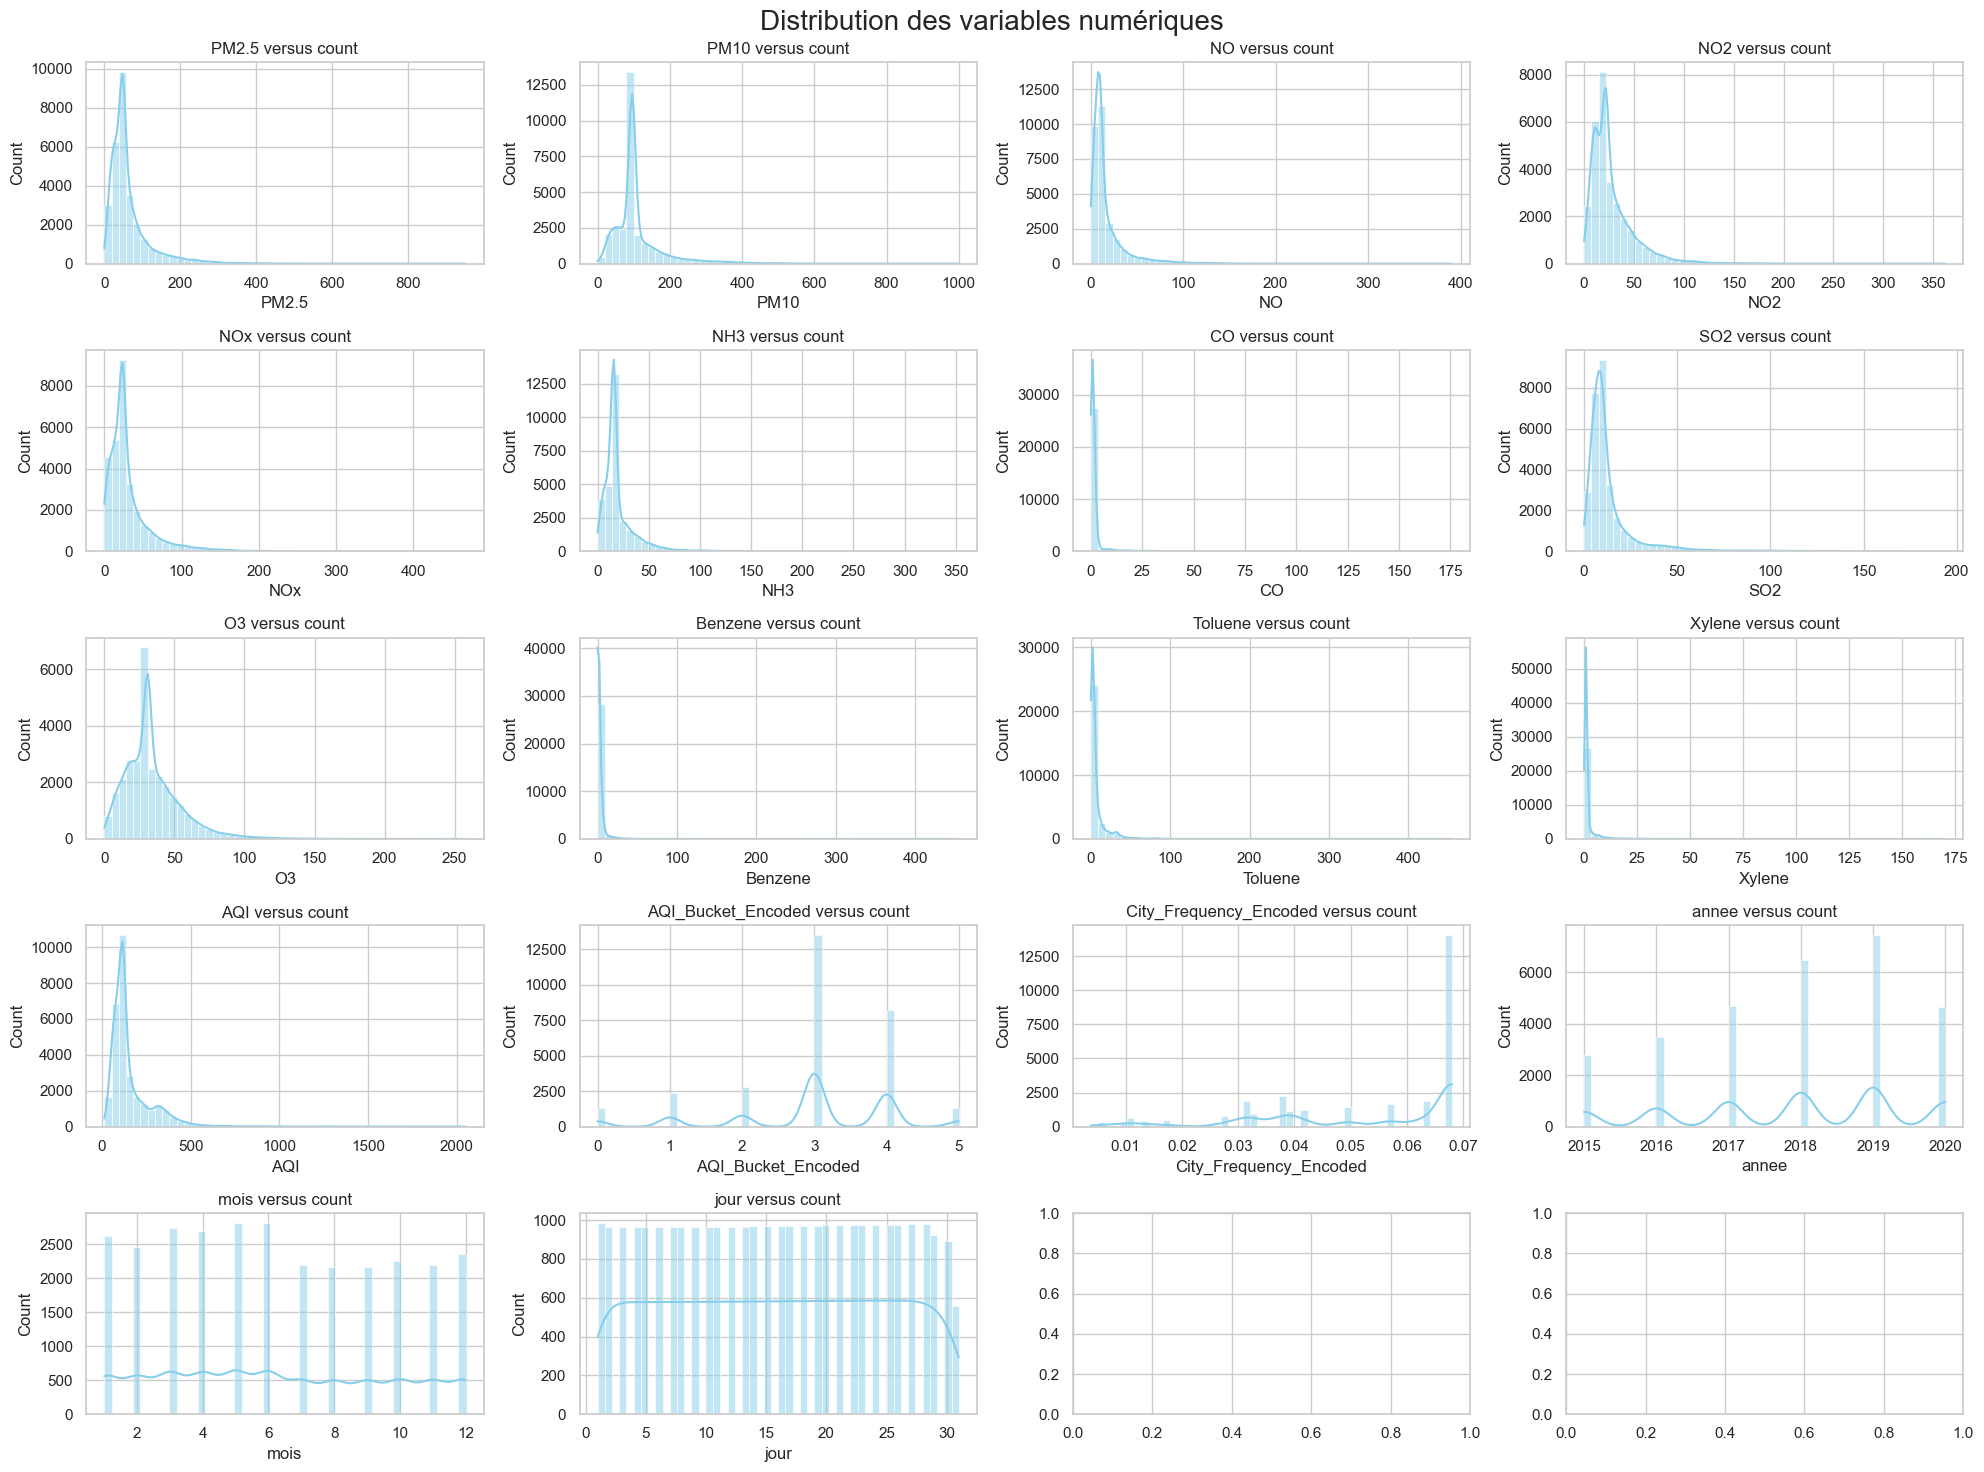

In [29]:

# Tracer les histogrammes des variables sélectionnées
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
fig.suptitle("Distribution des variables numériques", fontsize=20)

for i, col in enumerate(df.columns):
    row, col_num = divmod(i, 4)
    sns.histplot(df[col], bins=50, ax=axes[row, col_num], kde=True, color="skyblue")
    axes[row, col_num].set_title(col + " versus count")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()




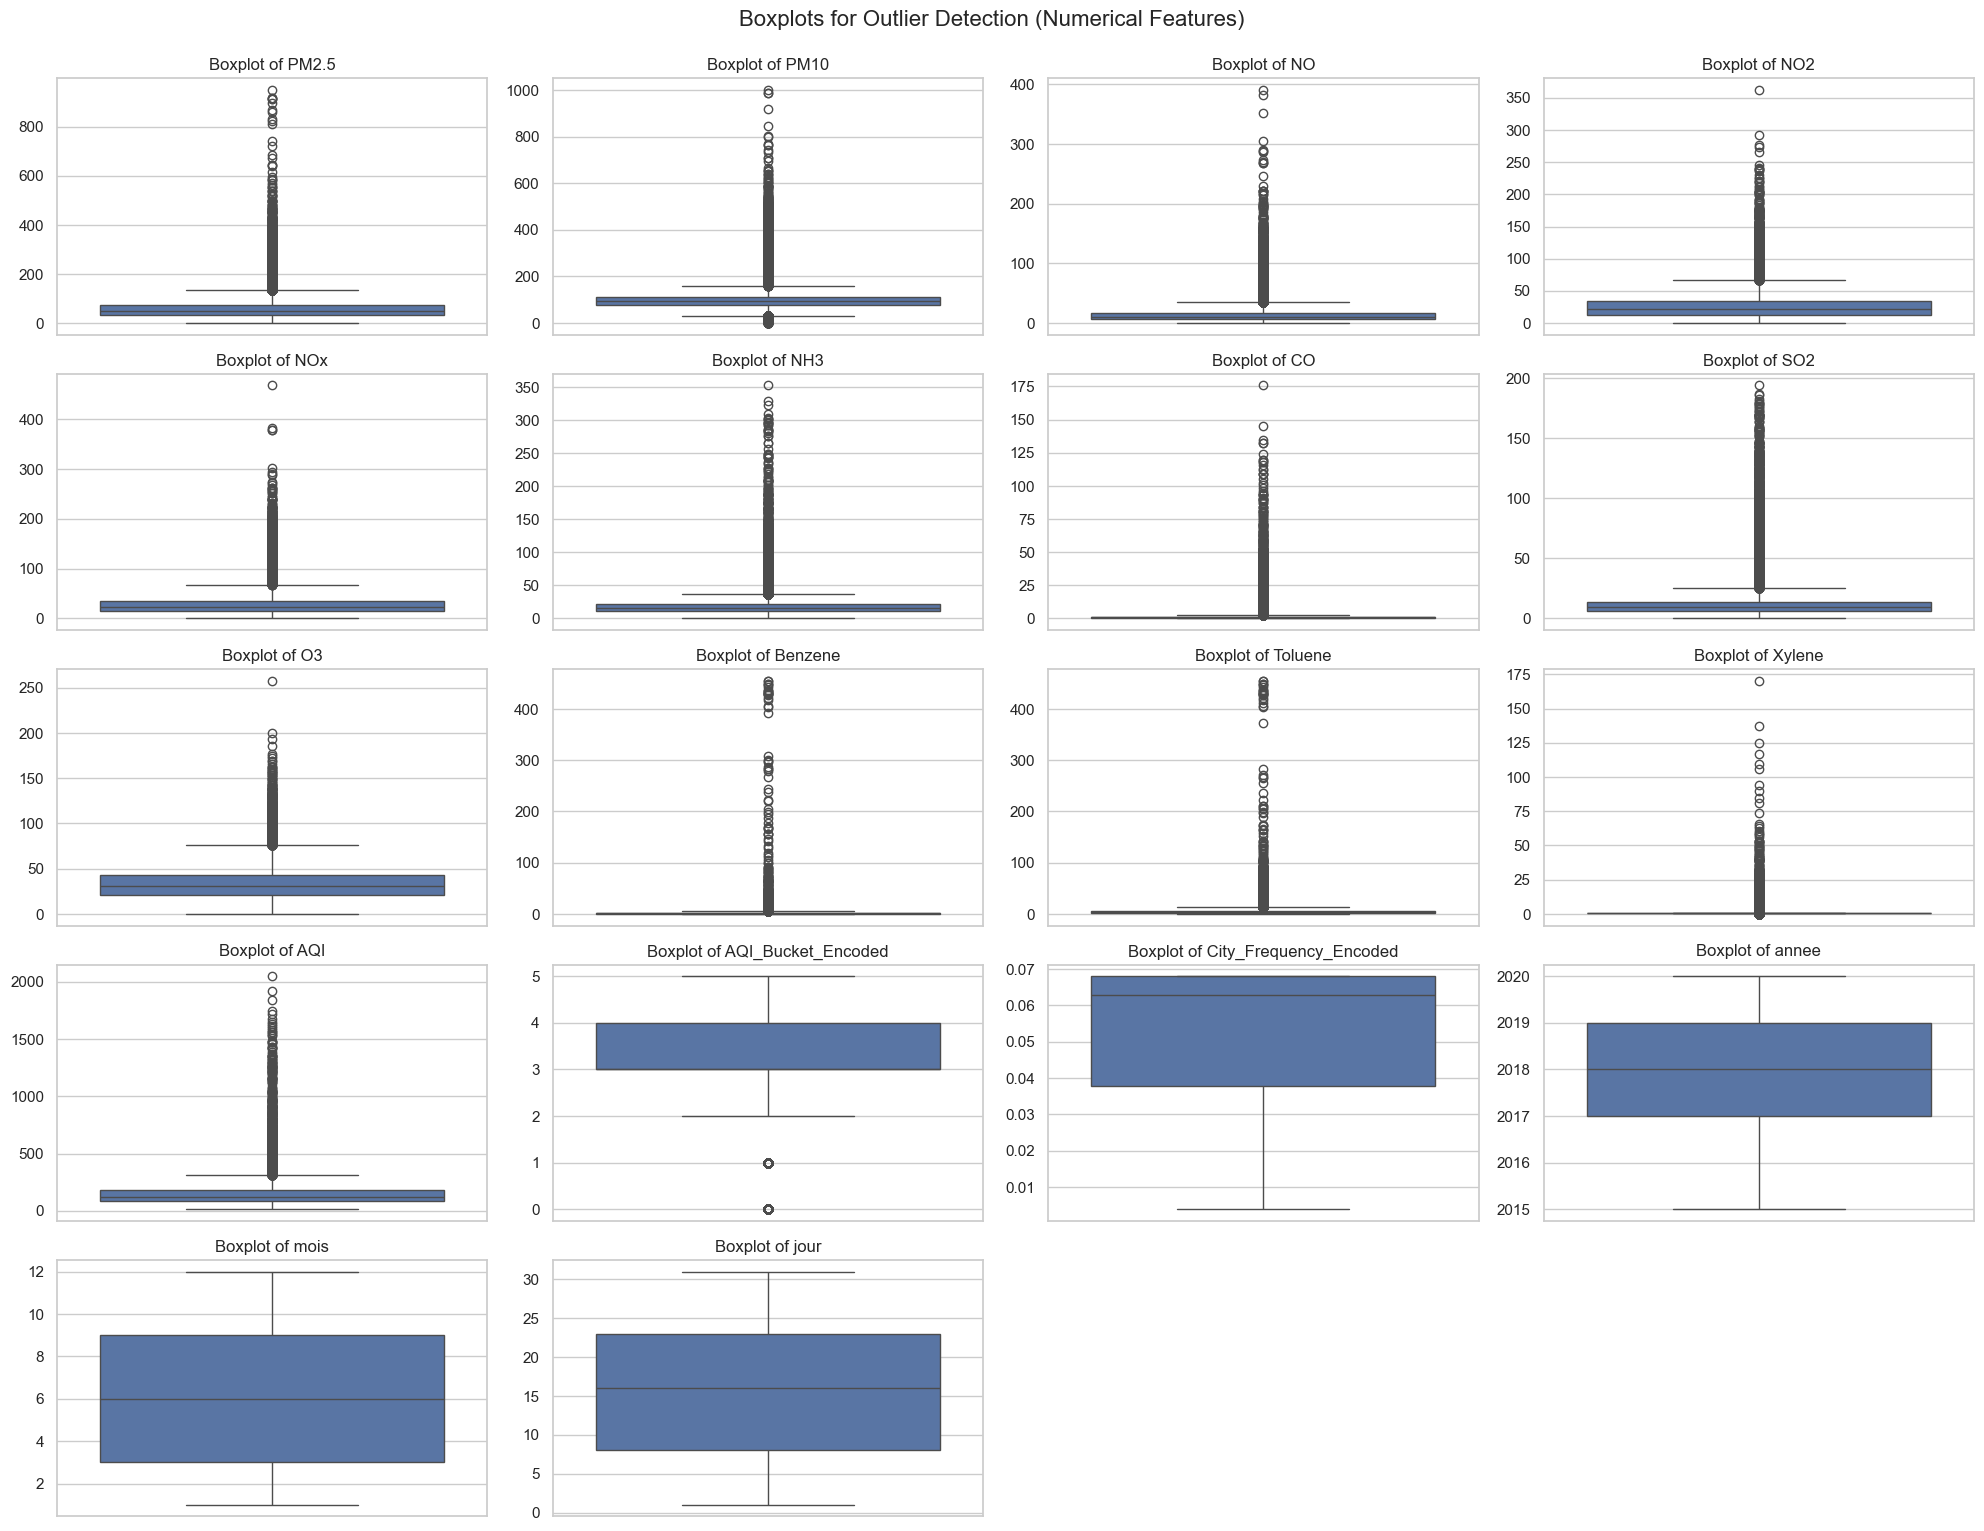

In [30]:
# Visualize individual outliers using boxplots

# Get numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.suptitle('Boxplots for Outlier Detection (Numerical Features)', y=1.02, fontsize=16)
plt.show()



 À supprimé 0 caractéristiques a cause de forte correlation (> 0.8): []

 Forme originale du DataFrame : (29531, 18)
Dimension du DataFrame apres suppression des colonnes fortement corrélés: (29531, 18)


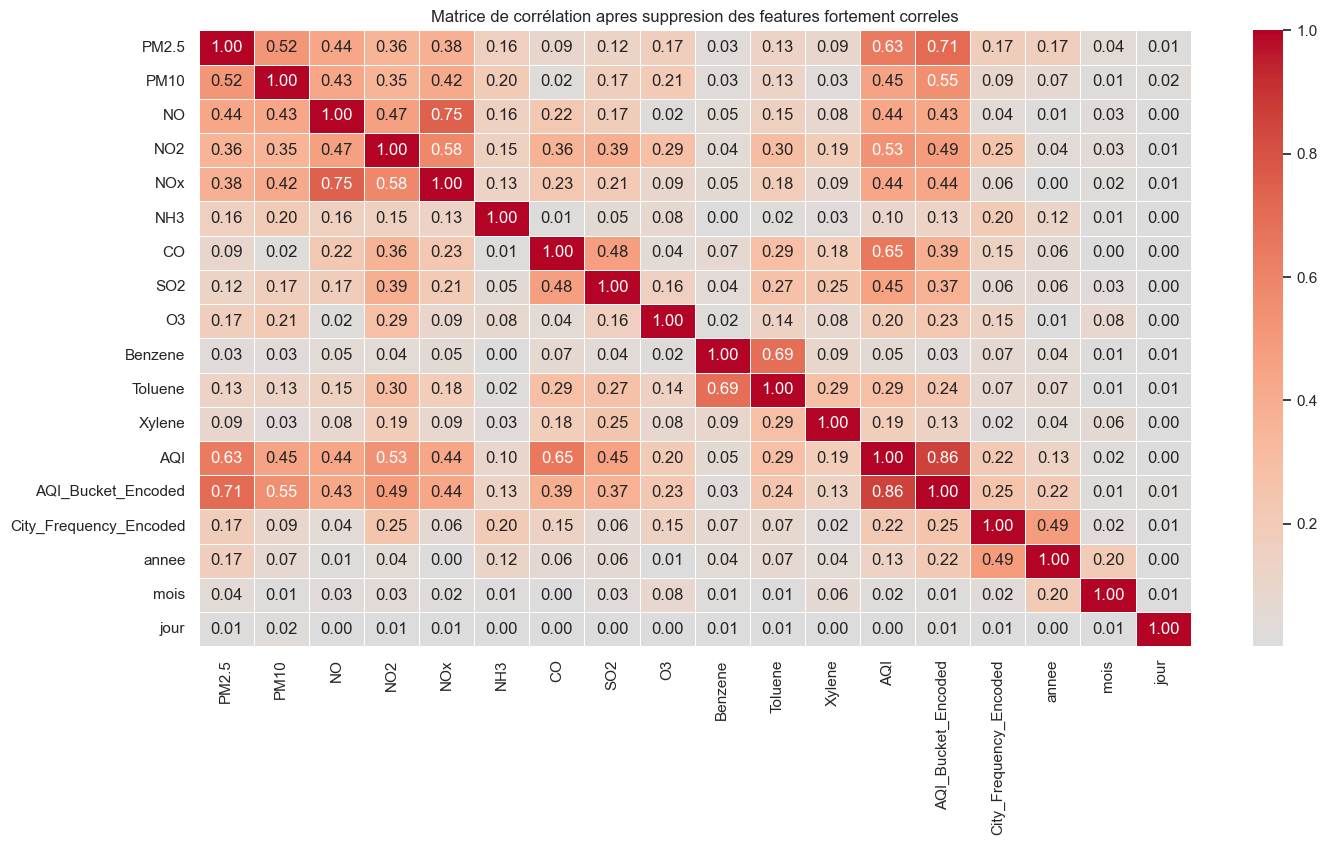

In [31]:


## MATRICE DE CORRELATION INITIALE APRES SUPPRESION DES CARACTERISTIQUES FORTEMENT CORRÉLÉ PLUS QUE LA VALEUR SEUIL

# Calcul de la matrice de correlation
matrice = df.corr().abs()

seuil = 0.8 # definition du seuil de correlation 0.8

upper_tri = matrice.where(np.triu(np.ones(matrice.shape), k=1).astype(bool))

# Identification des features a supprimer ( avec correlation > seuil de 0.8)en tenant compte de garder la cible
a_supprimer = [column for column in upper_tri.columns if any(upper_tri[column] > seuil) and column != 'AQI_Bucket_Encoded']


# Suppresion des features du dataframe identifie avec correlation > seuil de 0.8
df_reduced = df.drop(columns=a_supprimer)

print(f"\n À supprimé {len(a_supprimer)} caractéristiques a cause de forte correlation (> {seuil}): {a_supprimer}")


# Affichage du DataFrame apres suppression des caractéristiques fortement corrélées
print("\n Forme originale du DataFrame :", df.shape)
print("Dimension du DataFrame apres suppression des colonnes fortement corrélés:", df_reduced.shape)


# Mis a jour du df par notre reduced DataFrame
df = df_reduced.copy()


# Heat map
plt.figure(figsize=(16,8))
sns.heatmap(matrice, cmap='coolwarm', center=0, linewidths=0.5, annot=True, fmt=".2f")
plt.title('Matrice de corrélation apres suppresion des features fortement correles')
plt.show()



In [32]:
# Suppression manuelle de la caractéristique fortement corrélé "AQI"
df.drop('AQI', axis=1, inplace=True)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket_Encoded,City_Frequency_Encoded,annee,mois,jour
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,3.0,0.068030,2015,1,1
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,3.0,0.068030,2015,1,2
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,3.0,0.068030,2015,1,3
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,3.0,0.068030,2015,1,4
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,3.0,0.068030,2015,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,5.0,0.049507,2020,6,27
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,4.0,0.049507,2020,6,28
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,4.0,0.049507,2020,6,29
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,4.0,0.049507,2020,6,30


In [33]:
# --- Identification des outliers en utilisant la methode IQR ---



# Obtention des colonnes numeriques du DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Identification des outliers en utilisant la methode IQR:")
print("---------------------------------------")

outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    if len(outliers) > 0:
        print(f"Colonne '{col}': {len(outliers)} outliers détectés.")
    else:
        print(f"Colonne '{col}': Aucun outliers détecté.")

print("\n\n Resume du nombre de Outliers:")
for col, count in outlier_counts.items():
    print(f"- {col}: {count}")


Identification des outliers en utilisant la methode IQR:
---------------------------------------
Colonne 'PM2.5': 2736 outliers détectés.
Colonne 'PM10': 5322 outliers détectés.
Colonne 'NO': 3199 outliers détectés.
Colonne 'NO2': 1743 outliers détectés.
Colonne 'NOx': 2629 outliers détectés.
Colonne 'NH3': 3517 outliers détectés.
Colonne 'CO': 2747 outliers détectés.
Colonne 'SO2': 3154 outliers détectés.
Colonne 'O3': 1181 outliers détectés.
Colonne 'Benzene': 2646 outliers détectés.
Colonne 'Toluene': 3915 outliers détectés.
Colonne 'Xylene': 11398 outliers détectés.
Colonne 'AQI_Bucket_Encoded': 3675 outliers détectés.
Colonne 'City_Frequency_Encoded': Aucun outliers détecté.
Colonne 'annee': Aucun outliers détecté.
Colonne 'mois': Aucun outliers détecté.
Colonne 'jour': Aucun outliers détecté.


 Resume du nombre de Outliers:
- PM2.5: 2736
- PM10: 5322
- NO: 3199
- NO2: 1743
- NOx: 2629
- NH3: 3517
- CO: 2747
- SO2: 3154
- O3: 1181
- Benzene: 2646
- Toluene: 3915
- Xylene: 11398
-

Les variables PM10, NO, NH3, CO, SO2, Benzene, Toluene et surtout Xylene présentent un grand nombre d’outliers, suggérant une forte variabilité dans les mesures de qualité de l’air.

Ces valeurs extrêmes peuvent résulter :les concentrations de polluants varient fortement selon le lieu, la météo ou la saison.Donc certaines “valeurs extrêmes” peuvent simplement représenter des épisodes

# Séparation des données et échallonage
### Séparation des données prétraitées en ensembles d'entraînement et de test, et application du StandardScaler pour mettre à l'échelle les caractéristiques.

In [34]:
# Préparation des données en séparant les caractéristiques (X) et la variable cible (y) du DataFrame. La variable cible est 'AQI_Bucket_Encoded'.

X = df.drop('AQI_Bucket_Encoded', axis=1)
y = df['AQI_Bucket_Encoded']

print("Caractéristiques (X) shape:", X.shape)
print("Cible (y) shape:", y.shape)

Caractéristiques (X) shape: (29531, 16)
Cible (y) shape: (29531,)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Division des données en ensembles d'entraînement et de test (porcentage 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialisation du StandardScaler pour mettre à l'échelle les caractéristiques
scaler = StandardScaler()

# Fit du scaler au donnees d'entraînement et transform sur les donnees training et testing
# AJustement uniquement sur les données d'entraînement pour éviter toute fuite de données
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train shape: (23624, 16)
X_test shape: (5907, 16)
y_train shape: (23624,)
y_test shape: (5907,)

Features scaled successfully.
X_train_scaled shape: (23624, 16)
X_test_scaled shape: (5907, 16)


# Classification multiclasses des differents algorithmes  

## Classification K-Nearest Neighbors (KNN)



In [36]:


from sklearn.neighbors import KNeighborsClassifier

# Création du modèle KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrainement du modèle KNeighborsClassifier KNN en utilisant les donnees scaled training
knn_model.fit(X_train_scaled, y_train)

print("K-Nearest Neighbors (KNN) entraîné avec succès .")

# Faire des predictions sur scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation de la performance du modele

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy Score (KNN): {accuracy_knn:.4f}")

# Precision
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
print(f"Precision Score (KNN, weighted): {precision_knn:.4f}")

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
print(f"Recall Score (KNN, weighted): {recall_knn:.4f}")

# F1-score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)
print(f"F1-Score (KNN, weighted): {f1_knn:.4f}")

# Matrice de Confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"\nMatrice de Confusion  (KNN):\n{conf_matrix_knn}")

K-Nearest Neighbors (KNN) entraîné avec succès .

Accuracy Score (KNN): 0.7672
Precision Score (KNN, weighted): 0.7644
Recall Score (KNN, weighted): 0.7672
F1-Score (KNN, weighted): 0.7648

Matrice de Confusion  (KNN):
[[ 195   69    3    4    1    0]
 [  41  334   73   19    3    1]
 [   3   77  281  187    4    1]
 [   9   22  100 2328  298    6]
 [   0    0    4  313 1251   43]
 [   0    0    1   17   76  143]]


In [37]:
print("\n--- Évaluation du Modèle K-Nearest Neighbors (KNN) ---")
# Calcul des probabilités de prédictions pour KNN
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

# Calcul du log-loss pour KNN
log_loss_knn = log_loss(y_test, y_pred_proba_knn)
print(f"Log-Loss (KNN): {log_loss_knn:.4f}")

# Visualisation du Rapport de Classification pour KNN
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nRapport de Classification (KNN):\n", class_report_knn)


--- Évaluation du Modèle K-Nearest Neighbors (KNN) ---
Log-Loss (KNN): 2.3183

Rapport de Classification (KNN):
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       272
         1.0       0.67      0.71      0.69       471
         2.0       0.61      0.51      0.55       553
         3.0       0.81      0.84      0.83      2763
         4.0       0.77      0.78      0.77      1611
         5.0       0.74      0.60      0.66       237

    accuracy                           0.77      5907
   macro avg       0.73      0.69      0.71      5907
weighted avg       0.76      0.77      0.76      5907



## Classification Random Forest (RF)



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrainer le modèle  Random Forest Entrainer le modèle Decision Tree en utilisantles données d'entrainement scaled
rf_model.fit(X_train_scaled, y_train)

print("Random Forest (RF) entraîné avec succès .")

#  Faire des predictions sur les données scaled test
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation de la performance du modèle

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Score (RF): {accuracy_rf:.4f}")

# Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
print(f"Precision Score (RF, weighted): {precision_rf:.4f}")

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
print(f"Recall Score (RF, weighted): {recall_rf:.4f}")

# F1-score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
print(f"F1-Score (RF, weighted): {f1_rf:.4f}")

# Matrice de Confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\nMatrice de Confusion  (RF):\n{conf_matrix_rf}")

Random Forest (RF) entraîné avec succès .

Accuracy Score (RF): 0.8250
Precision Score (RF, weighted): 0.8230
Recall Score (RF, weighted): 0.8250
F1-Score (RF, weighted): 0.8232

Matrice de Confusion  (RF):
[[ 209   53    7    3    0    0]
 [  34  367   57   12    1    0]
 [   0   56  343  153    1    0]
 [   6   13   85 2456  197    6]
 [   0    0    2  224 1351   34]
 [   0    0    1    9   80  147]]


In [39]:
print("\n--- Évaluation du Modèle Random Forest (RF) ---")
# Calcul des probabilités de prédictions pour RF
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)

# Calcul du log-loss pour RF
log_loss_rf = log_loss(y_test, y_pred_proba_rf)
print(f"Log-Loss (RF): {log_loss_rf:.4f}")

# Visualisation du Rapport de Classification pour RF
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nRapport de Classification (RF):\n", class_report_rf)


--- Évaluation du Modèle Random Forest (RF) ---
Log-Loss (RF): 0.5840

Rapport de Classification (RF):
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       272
         1.0       0.75      0.78      0.76       471
         2.0       0.69      0.62      0.65       553
         3.0       0.86      0.89      0.87      2763
         4.0       0.83      0.84      0.83      1611
         5.0       0.79      0.62      0.69       237

    accuracy                           0.82      5907
   macro avg       0.79      0.75      0.77      5907
weighted avg       0.82      0.82      0.82      5907



## Classification XGBoost (XGB)

In [40]:
from xgboost import XGBClassifier

# Initialize an XGBClassifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entrainer le modèle  XGBoost Entrainer le modèle Decision Tree en utilisantles données d'entrainement scaled
xgb_model.fit(X_train_scaled, y_train)

print("XGBoost (XGB) entraîné avec succès .")

#  Faire des predictions sur les données scaled test
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation de la performance du modèle

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy Score (XGB): {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
print(f"Precision Score (XGB, weighted): {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
print(f"Recall Score (XGB, weighted): {recall_xgb:.4f}")

# F1-score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
print(f"F1-Score (XGB, weighted): {f1_xgb:.4f}")

# Matrice de Confusion
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"\nMatrice de Confusion  (XGB):\n{conf_matrix_xgb}")

c:\Users\16133\Downloads\Projet_ia\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (XGB) entraîné avec succès .

Accuracy Score (XGB): 0.8283
Precision Score (XGB, weighted): 0.8266
Recall Score (XGB, weighted): 0.8283
F1-Score (XGB, weighted): 0.8269

Matrice de Confusion  (XGB):
[[ 215   47    7    3    0    0]
 [  33  364   62   11    1    0]
 [   0   54  342  156    1    0]
 [   8   16   80 2437  217    5]
 [   0    0    1  196 1376   38]
 [   0    0    1    9   68  159]]


In [41]:
print("\n--- Évaluation du Modèle XGBoost (XGB) ---")
# Calcul des probabilités de prédictions pour XGB
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)

# Calcul du log-loss pour XGB
log_loss_xgb = log_loss(y_test, y_pred_proba_xgb)
print(f"Log-Loss (XGB): {log_loss_xgb:.4f}")

# Visualisation du Rapport de Classification pour XGB
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("\nRapport de Classification (XGB):\n", class_report_xgb)


--- Évaluation du Modèle XGBoost (XGB) ---
Log-Loss (XGB): 0.4689

Rapport de Classification (XGB):
               precision    recall  f1-score   support

         0.0       0.84      0.79      0.81       272
         1.0       0.76      0.77      0.76       471
         2.0       0.69      0.62      0.65       553
         3.0       0.87      0.88      0.87      2763
         4.0       0.83      0.85      0.84      1611
         5.0       0.79      0.67      0.72       237

    accuracy                           0.83      5907
   macro avg       0.80      0.76      0.78      5907
weighted avg       0.83      0.83      0.83      5907



## Évaluation et classement des modèles de classification et Resume des Performances des modèles
###
Nous allons recueillir les métriques de performance (précision, rappel, F1-score, log-loss) pour chaque modèle de classification entraîné (Régression Logistique, KNN, Arbre de Décision, Random Forest, XGBoost, SVC) et afficher les rapports de classification détaillés pour chaque modèle, puis présenter un tableau récapitulatif des performances, trié du meilleur au moins bon.


In [42]:
# Résumé comparatif des performances de tous les modèles de classification basé sur les métriques d'évaluation.


# Creation du dictionare pour enregistrement des metriques

model_performance = {
    'Model': [ 'KNN', 'Random Forest', 'XGBoost' ],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_xgb],
    'Precision': [precision_knn,  precision_rf, precision_xgb, ],
    'Recall': [recall_knn, recall_rf, recall_xgb],
    'F1-score': [f1_knn, f1_rf, f1_xgb ],
    'Log-Loss': [ log_loss_knn,  log_loss_rf, log_loss_xgb]
}

# Conversion du dictionaire eu un  pandas DataFrame
performance_df = pd.DataFrame(model_performance)

# Tri du DataFrame a partir du F1-score par ordre decroissant
performance_df_sorted = performance_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

# Affichage du DataFrame classé
print("\nTableau récapitulatif des performances des modèles (trié par F1-score) :")
print(performance_df_sorted)


Tableau récapitulatif des performances des modèles (trié par F1-score) :
           Model  Accuracy  Precision    Recall  F1-score  Log-Loss
0        XGBoost  0.828339   0.826570  0.828339  0.826936  0.468882
1  Random Forest  0.824953   0.823047  0.824953  0.823204  0.584040
2            KNN  0.767225   0.764382  0.767225  0.764843  2.318326


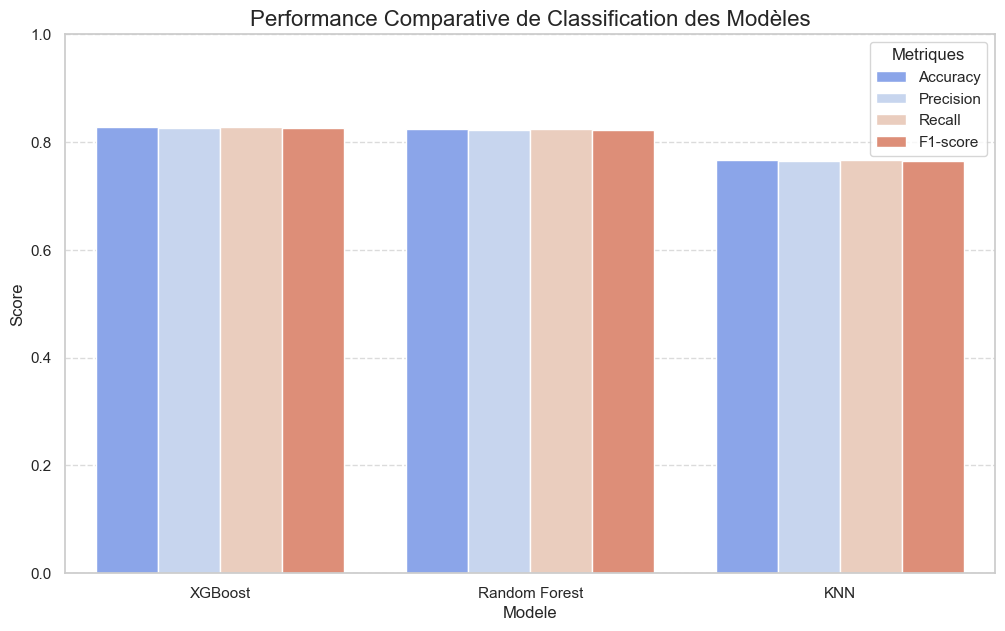

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparation des donnes du graphique
plot_df = performance_df_sorted.set_index('Model').stack().reset_index()
plot_df.columns = ['Model', 'Metric', 'Value']

# On enleve 'Log-Loss' puisqu'elle est sur une echelle differente
plot_df_filtered = plot_df[plot_df['Metric'] != 'Log-Loss']

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Value', hue='Metric', data=plot_df_filtered, palette='coolwarm')
plt.title('Performance Comparative de Classification des Modèles', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Modele', fontsize=12)
plt.ylim(0, 1) # plage des scores entre o et 1
plt.legend(title='Metriques')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Résumé :

Les modèles ont été évalués et classés en fonction de leurs métriques de performance, avec les résultats suivants :

- XGBoost est le modèle le plus performant, avec le score F1 le plus élevé (0.826936) et la perte logarithmique la plus faible (0.468882).

- Les modèles se classent comme suit (du meilleur au pire, principalement par score F1) : XGBoost, Random Forest, K-Nearest Neighbors (KNN)

### Principales conclusions de l'analyse des données :

- **XGBoost** s'est révélé être le modèle le plus performant avec un score F1 de 0.826936, une précision de 0.828339 et la perte logarithmique la plus faible de 0.468882.
- **Random Forest** a suivi de près, se classant en deuxième position avec un score F1 de 0.823204 et une perte logarithmique de 0.584040.
- **K-Nearest Neighbors (KNN)** a obtenu un score F1 de 0.764843 mais une perte logarithmique significativement plus élevée de 2.318326, ce qui indique des prédictions de probabilité moins fiables.


### Perspectives :

- Étant donné la performance supérieure de XGBoost et Random Forest, une exploration supplémentaire de l'optimisation des hyperparamètres ou de l'ingénierie des fonctionnalités pourrait être envisagée pour ces modèles afin d'améliorer potentiellement encore davantage leur pouvoir prédictif.

### Réglage des hyperparamètres (n_neighbors, weights, metric) avec validation croisée pour KNN


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# réglage des hyperparamètres (n_neighbors, weights, metric) avec validation croisée

# Définir la grille de paramètres pour KNeighborsClassifier
param_grid = {
    'n_neighbors': [5, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialiser un objet KNeighborsClassifier
knn_base = KNeighborsClassifier()

# Initialiser un objet GridSearchCV
# Utiliser 'f1_weighted' comme scoring car c'est une classification multi-classes avec un déséquilibre potentiel
# cv=5 pour une validation croisée à 5 plis
grid_search_knn = GridSearchCV(estimator=knn_base, param_grid=param_grid,
                               scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Entraîner GridSearchCV sur les données d'entraînement mises à l'échelle
grid_search_knn.fit(X_train_scaled, y_train)

print("Optimisation GridSearchCV terminée.")

# Afficher les meilleurs hyperparamètres trouvés
print(f"\nMeilleurs hyperparamètres pour KNN: {grid_search_knn.best_params_}")

# Afficher le meilleur score de validation croisée
print(f"Meilleur score F1 pondéré de validation croisée: {grid_search_knn.best_score_:.4f}")

# Récupérer le meilleur modèle
best_knn_model = grid_search_knn.best_estimator_

# Faire des prédictions sur les données de test mises à l'échelle avec le meilleur modèle
y_pred_knn_optimized = best_knn_model.predict(X_test_scaled)

#  Calculer et afficher les métriques de performance pour le modèle KNN optimisé
accuracy_knn_opt = accuracy_score(y_test, y_pred_knn_optimized)
precision_knn_opt = precision_score(y_test, y_pred_knn_optimized, average='weighted', zero_division=0)
recall_knn_opt = recall_score(y_test, y_pred_knn_optimized, average='weighted', zero_division=0)
f1_knn_opt = f1_score(y_test, y_pred_knn_optimized, average='weighted', zero_division=0)
conf_matrix_knn_opt = confusion_matrix(y_test, y_pred_knn_optimized)

print(f"\nAccuracy Score (KNN Optimisé): {accuracy_knn_opt:.4f}")
print(f"Precision Score (KNN Optimisé, pondéré): {precision_knn_opt:.4f}")
print(f"Recall Score (KNN Optimisé, pondéré): {recall_knn_opt:.4f}")
print(f"F1-Score (KNN Optimisé, pondéré): {f1_knn_opt:.4f}")
print(f"\nMatrice de Confusion (KNN Optimisé):\n{conf_matrix_knn_opt}")

#  Calculer et afficher le Log-Loss pour le modèle KNN optimisé
y_pred_proba_knn_optimized = best_knn_model.predict_proba(X_test_scaled)
log_loss_knn_opt = log_loss(y_test, y_pred_proba_knn_optimized)
print(f"\nLog-Loss (KNN Optimisé): {log_loss_knn_opt:.4f}")

# Afficher le rapport de classification détaillé
class_report_knn_opt = classification_report(y_test, y_pred_knn_optimized)
print(f"\nRapport de Classification (KNN Optimisé):\n{class_report_knn_opt}")

# Mettre à jour le dictionnaire de performance pour inclure le modèle KNN optimisé
model_performance['Model'].append('KNN Optimisé')
model_performance['Accuracy'].append(accuracy_knn_opt)
model_performance['Precision'].append(precision_knn_opt)
model_performance['Recall'].append(recall_knn_opt)
model_performance['F1-score'].append(f1_knn_opt)
model_performance['Log-Loss'].append(log_loss_knn_opt)

# Mettre à jour et trier le DataFrame de performance
performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
print("\nTableau récapitulatif des performances des modèles mis à jour et trié par F1-score")
print(performance_df_sorted)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Optimisation GridSearchCV terminée.

Meilleurs hyperparamètres pour KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Meilleur score F1 pondéré de validation croisée: 0.7792

Accuracy Score (KNN Optimisé): 0.7804
Precision Score (KNN Optimisé, pondéré): 0.7765
Recall Score (KNN Optimisé, pondéré): 0.7804
F1-Score (KNN Optimisé, pondéré): 0.7773

Matrice de Confusion (KNN Optimisé):
[[ 198   66    5    3    0    0]
 [  35  327   87   18    3    1]
 [   2   65  269  209    8    0]
 [   6   14   75 2360  296   12]
 [   0    0    1  249 1308   53]
 [   0    0    0   11   78  148]]

Log-Loss (KNN Optimisé): 1.3568

Rapport de Classification (KNN Optimisé):
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       272
         1.0       0.69      0.69      0.69       471
         2.0       0.62      0.49      0.54       553
         3.0       0.83      0.85      0.8

### Réglage des hyperparamètres (n_estimators, max_depth, min_samples_leaf) avec validation croisée pour RandomForestClassifier

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, classification_report

# réglage des hyperparamètres (n_estimators, max_depth, min_samples_leaf) avec validation croisée

# Définir la grille de paramètres pour RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None], # None signifie pas de limite sur la profondeur
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser un objet RandomForestClassifier
rf_base = RandomForestClassifier(random_state=42)

# Initialiser un objet GridSearchCV
# Utiliser 'f1_weighted' comme scoring car c'est une classification multi-classes avec un déséquilibre potentiel
# cv=5 pour une validation croisée à 5 plis
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf,
                               scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Entraîner GridSearchCV sur les données d'entraînement mises à l'échelle
grid_search_rf.fit(X_train_scaled, y_train)

print("Optimisation GridSearchCV terminée.")

# Afficher les meilleurs hyperparamètres trouvés
print(f"\nMeilleurs hyperparamètres pour Random Forest: {grid_search_rf.best_params_}")

# Afficher le meilleur score F1 pondéré de validation croisée
print(f"Meilleur score F1 pondéré de validation croisée: {grid_search_rf.best_score_:.4f}")

# Récupérer le meilleur modèle
best_rf_model = grid_search_rf.best_estimator_

# Faire des prédictions sur les données de test mises à l'échelle avec le meilleur modèle
y_pred_rf_optimized = best_rf_model.predict(X_test_scaled)

#  Calculer et afficher les métriques de performance pour le modèle Random Forest optimisé
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_optimized)
precision_rf_opt = precision_score(y_test, y_pred_rf_optimized, average='weighted', zero_division=0)
recall_rf_opt = recall_score(y_test, y_pred_rf_optimized, average='weighted', zero_division=0)
f1_rf_opt = f1_score(y_test, y_pred_rf_optimized, average='weighted', zero_division=0)
conf_matrix_rf_opt = confusion_matrix(y_test, y_pred_rf_optimized)

print(f"\nAccuracy Score (Random Forest Optimisé): {accuracy_rf_opt:.4f}")
print(f"Precision Score (Random Forest Optimisé, pondéré): {precision_rf_opt:.4f}")
print(f"Recall Score (Random Forest Optimisé, pondéré): {recall_rf_opt:.4f}")
print(f"F1-Score (Random Forest Optimisé, pondéré): {f1_rf_opt:.4f}")
print(f"\nMatrice de Confusion (Random Forest Optimisé):\n{conf_matrix_rf_opt}")

#  Calculer et afficher le Log-Loss pour le modèle Random Forest optimisé
y_pred_proba_rf_optimized = best_rf_model.predict_proba(X_test_scaled)
log_loss_rf_opt = log_loss(y_test, y_pred_proba_rf_optimized)
print(f"\nLog-Loss (Random Forest Optimisé): {log_loss_rf_opt:.4f}")

# Afficher le rapport de classification détaillé
class_report_rf_opt = classification_report(y_test, y_pred_rf_optimized)
print(f"\nRapport de Classification (Random Forest Optimisé):\n{class_report_rf_opt}")

# Mettre à jour le dictionnaire de performance pour inclure le modèle Random Forest optimisé
model_performance['Model'].append('Random Forest Optimisé')
model_performance['Accuracy'].append(accuracy_rf_opt)
model_performance['Precision'].append(precision_rf_opt)
model_performance['Recall'].append(recall_rf_opt)
model_performance['F1-score'].append(f1_rf_opt)
model_performance['Log-Loss'].append(log_loss_rf_opt)

# Mettre à jour et trier le DataFrame de performance
performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)
print("\nTableau récapitulatif des performances des modèles mis à jour et trié par F1-score :")
print(performance_df_sorted)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Optimisation GridSearchCV terminée.

Meilleurs hyperparamètres pour Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
Meilleur score F1 pondéré de validation croisée: 0.8219

Accuracy Score (Random Forest Optimisé): 0.8258
Precision Score (Random Forest Optimisé, pondéré): 0.8242
Recall Score (Random Forest Optimisé, pondéré): 0.8258
F1-Score (Random Forest Optimisé, pondéré): 0.8238

Matrice de Confusion (Random Forest Optimisé):
[[ 209   52    7    4    0    0]
 [  32  365   63   10    1    0]
 [   0   55  342  155    1    0]
 [   6   15   75 2457  207    3]
 [   0    0    1  222 1361   27]
 [   0    0    0   10   83  144]]

Log-Loss (Random Forest Optimisé): 0.4925

Rapport de Classification (Random Forest Optimisé):
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       272
         1.0       0.75      0.77      0.76       471
         2.0    

### Réglage des hyperparamètres n_estimators, max_depth et learning_rate pour XGBoost


In [46]:
import mlflow
import mlflow.sklearn
import pickle
import os
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# ------------------------------------------------------------
# CONFIG MLflow (DagsHub)
# ------------------------------------------------------------
mlflow.set_tracking_uri("https://dagshub.com/yasmine.ameur199/Air_Quality_Data_in_India.mlflow")
mlflow.set_experiment("XGBoost_Optimization")

os.environ['MLFLOW_TRACKING_USERNAME'] = "yasmine.ameur199"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "056e487658dddd64fefc0ced79eb6ea9dd1d4949"

# ------------------------------------------------------------
# GRID SEARCH XGBOOST
# ------------------------------------------------------------
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0]
}

xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# ------------------------------------------------------------
# TRACKING MLflow
# ------------------------------------------------------------
with mlflow.start_run(run_name="XGB_GridSearch_Optimized"):

    grid_search_xgb.fit(X_train_scaled, y_train)

    print("Optimisation GridSearchCV terminée.")
    print(f"Meilleurs hyperparamètres : {grid_search_xgb.best_params_}")
    print(f"Meilleur score F1 pondéré : {grid_search_xgb.best_score_:.4f}")

    best_xgb_model = grid_search_xgb.best_estimator_

    mlflow.log_params(grid_search_xgb.best_params_)
    mlflow.sklearn.log_model(best_xgb_model, "best_xgb_model")

    with open("best_xgb_model.pkl", "wb") as f:
        pickle.dump(best_xgb_model, f)

    print("Modèle sauvegardé dans 'best_xgb_model.pkl'")
    print("Modèle envoyé à MLflow DagsHub")

    # --------------------------------------------------------
    # PRÉDICTION + MÉTRIQUES
    # --------------------------------------------------------
    y_pred_xgb_optimized = best_xgb_model.predict(X_test_scaled)

    accuracy_xgb_opt = accuracy_score(y_test, y_pred_xgb_optimized)
    precision_xgb_opt = precision_score(y_test, y_pred_xgb_optimized, average='weighted', zero_division=0)
    recall_xgb_opt = recall_score(y_test, y_pred_xgb_optimized, average='weighted', zero_division=0)
    f1_xgb_opt = f1_score(y_test, y_pred_xgb_optimized, average='weighted', zero_division=0)

    mlflow.log_metric("accuracy", accuracy_xgb_opt)
    mlflow.log_metric("precision", precision_xgb_opt)
    mlflow.log_metric("recall", recall_xgb_opt)
    mlflow.log_metric("f1_score", f1_xgb_opt)

    y_pred_proba_xgb_optimized = best_xgb_model.predict_proba(X_test_scaled)
    log_loss_xgb_opt = log_loss(y_test, y_pred_proba_xgb_optimized)
    mlflow.log_metric("log_loss", log_loss_xgb_opt)

    print(f"Accuracy : {accuracy_xgb_opt:.4f}")
    print(f"Precision : {precision_xgb_opt:.4f}")
    print(f"Recall : {recall_xgb_opt:.4f}")
    print(f"F1-Score : {f1_xgb_opt:.4f}")
    print(f"Log-Loss : {log_loss_xgb_opt:.4f}")

    print("Tous les résultats ont été envoyés à MLflow.")

# ------------------------------------------------------------
# Mise à jour du tableau de performance
# ------------------------------------------------------------
model_performance['Model'].append('XGBoost Optimisé')
model_performance['Accuracy'].append(accuracy_xgb_opt)
model_performance['Precision'].append(precision_xgb_opt)
model_performance['Recall'].append(recall_xgb_opt)
model_performance['F1-score'].append(f1_xgb_opt)
model_performance['Log-Loss'].append(log_loss_xgb_opt)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\16133\Downloads\Projet_ia\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:04:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimisation GridSearchCV terminée.
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Meilleur score F1 pondéré : 0.8241


MlflowException: API request to https://dagshub.com/yasmine.ameur199/Air_Quality_Data_in_India.mlflow/api/2.0/mlflow-artifacts/artifacts/901fdde2d18e48bdb697895a94c45d72/3b7cedb04d4a4a7e9290ca396f41d83e/artifacts/best_xgb_model/conda.yaml failed with exception HTTPSConnectionPool(host='dagshub.com', port=443): Max retries exceeded with url: /yasmine.ameur199/Air_Quality_Data_in_India.mlflow/api/2.0/mlflow-artifacts/artifacts/901fdde2d18e48bdb697895a94c45d72/3b7cedb04d4a4a7e9290ca396f41d83e/artifacts/best_xgb_model/conda.yaml (Caused by ResponseError('too many 500 error responses'))

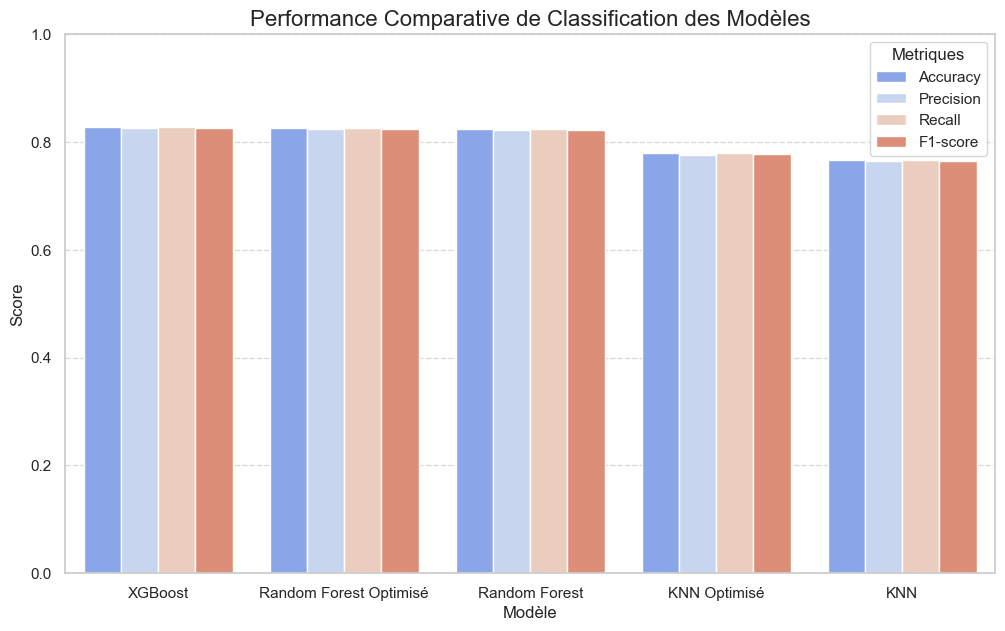

In [ ]:

# Preparation des donnes du nouveau graphique avec optimisation
plot_df = performance_df_sorted.set_index('Model').stack().reset_index()
plot_df.columns = ['Model', 'Metric', 'Value']

# On enleve 'Log-Loss' puisqu'elle est sur une echelle differente
plot_df_filtered = plot_df[plot_df['Metric'] != 'Log-Loss']

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Value', hue='Metric', data=plot_df_filtered, palette='coolwarm')
plt.title('Performance Comparative de Classification des Modèles', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Modèle', fontsize=12)
plt.ylim(0, 1) # plage des scores entre o et 1
plt.legend(title='Metriques')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Résumé des Performances et de la Rapidité des Modèles


In [ ]:
import pandas as pd

# Création du dictionnaire pour enregistrer les métriques (assurez-vous qu'il est mis à jour)
model_performance = {
    'Model': ['KNN', 'Random Forest', 'XGBoost', 'KNN Optimisé', 'Random Forest Optimisé', 'XGBoost Optimisé'],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_xgb, accuracy_knn_opt, accuracy_rf_opt, accuracy_xgb_opt],
    'Precision': [precision_knn, precision_rf, precision_xgb, precision_knn_opt, precision_rf_opt, precision_xgb_opt],
    'Recall': [recall_knn, recall_rf, recall_xgb, recall_knn_opt, recall_rf_opt, recall_xgb_opt],
    'F1-score': [f1_knn, f1_rf, f1_xgb, f1_knn_opt, f1_rf_opt, f1_xgb_opt],
    'Log-Loss': [log_loss_knn, log_loss_rf, log_loss_xgb, log_loss_knn_opt, log_loss_rf_opt, log_loss_xgb_opt]
}

# Conversion du dictionnaire en un pandas DataFrame
performance_df = pd.DataFrame(model_performance)

# Tri du DataFrame par F1-score décroissant
performance_df_sorted = performance_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

display(performance_df_sorted)


,Model,Accuracy,Precision,Recall,F1-score,Log-Loss
0,XGBoost Optimisé,0.832402,0.830755,0.832402,0.831004,0.446251
1,XGBoost,0.828339,0.826570,0.828339,0.826936,0.468882
2,Random Forest Optimisé,0.825800,0.824209,0.825800,0.823829,0.492517
3,Random Forest,0.824953,0.823047,0.824953,0.823204,0.584040
4,KNN Optimisé,0.780430,0.776484,0.780430,0.777322,1.356759
5,KNN,0.767225,0.764382,0.767225,0.764843,2.318326


In [ ]:
# Commentaire sur les Performances et la Rapidité:

# XGBoost Optimisé se positionne comme le plus performant, atteignant le F1-score le plus élevé (0.8312) et le Log-Loss le plus bas (0.4472). Cela indique une excellente capacité à classer correctement les différentes catégories d'AQI et des estimations de probabilité très fiables. En termes de rapidité, les modèles basés sur les arbres, comme XGBoost, peuvent être plus lents à entraîner que des modèles plus simples comme KNN, surtout avec un grand nombre d'estimateurs et une profondeur d'arbre importante. Cependant, leur performance justifie souvent ce coût.

# KNN non optimisé a les performances les plus faibles parmi les modèles évalués, en particulier pour le Log-Loss, ce qui le rend moins idéal pour des applications où la fiabilité des probabilités est cruciale.



### Conclusion :
Nous constatons directement que l'optimisation ameliore le score de chaque modèle
Les modèles basés sur les arbres (XGBoost et Random Forest), en particulier après optimisation, offrent les meilleures performances pour la prédiction de la qualité de l'air. Bien qu'ils soient potentiellement plus coûteux en temps de calcul pour l'entraînement, leurs scores de F1-score élevés et leurs faibles Log-Loss en font les choix privilégiés. L'optimisation des hyperparamètres, bien que nécessitant plus de ressources initialement, a prouvé son efficacité en améliorant les performances des modèles, notamment en affinant la capacité prédictive d'XGBoost et Random Forest, et en rendant KNN plus compétitif.


In [ ]:
df

NameError: name 'df' is not defined